# Pentose Phosphate Pathway

To construct a model of the pentose phosphate pathway, first we import  __masspy__ . 

In [1]:
import os

import matplotlib.pyplot as plt

from mass import (
    io, MassMetabolite, MassReaction, MassModel, Simulation, plot_simulation, qcqa_model)

## Model Construction 

The first step of creating a model of pentose phosphate pathway is to define the MassModel object. 

In [2]:
ppp = MassModel("Pentose_Phosphate_Pathway")

### Metabolites

The next step is to define all of the metabolites in pentose phosphate pathway using identifiers and the names found in the BiGG Database (http://bigg.ucsd.edu/). In order to ensure our model is physiologically accurate, it is important to provide the __formula__ keyword with a string representing the chemical formula for each metabolite, and the  __charge__ keyword with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). To indicate that the cytosol is the cellular compartment in which pentose phosphate pathway occurs, the string "c" is provided to the __compartment__ keyword. 

In this model of the pentose phosphate pathway, there are 17 metabolites inside the cytosol compartment. 

In [3]:
g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c")
_6pgl_c = MassMetabolite(
    "_6pgl_c",
    name="6-Phospho-D-gluco-1,5-lactone",
    formula="C6H9O9P",
    charge=-2,
    compartment="c")
_6pgc_c = MassMetabolite(
    "_6pgc_c",
    name="6-Phospho-D-gluconate",
    formula="C6H10O10P",
    charge=-3,
    compartment="c")
ru5p__D_c = MassMetabolite(
    "ru5p__D_c",
    name="D-Ribulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c")
r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c")
xu5p__D_c = MassMetabolite(
    "xu5p__D_c",
    name="D-Xylulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c")
g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c")
s7p_c = MassMetabolite(
    "s7p_c",
    name="Sedoheptulose 7-phosphate",
    formula="C7H13O10P",
    charge=-2,
    compartment="c")
f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c")
e4p_c = MassMetabolite(
    "e4p_c",
    name="D-Erythrose 4-phosphate",
    formula="C4H7O7P",
    charge=-2,
    compartment="c")

# Cofactors
h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c")
nadp_c = MassMetabolite(
    "nadp_c",
    name="Nicotinamide adenine dinucleotide phosphate",
    formula="C21H25N7O17P3",
    charge=-3,
    compartment="c")
nadph_c = MassMetabolite(
    "nadph_c",
    name="Nicotinamide adenine dinucleotide phosphate - reduced",
    formula="C21H26N7O17P3",
    charge=-4,
    compartment="c")
h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c")
co2_c = MassMetabolite(
    "co2_c",
    name="CO2",
    formula="CO2",
    charge=0,
    compartment="c")
gthox_c = MassMetabolite(
    "gthox_c",
    name="Oxidized glutathione",
    formula="C20H30N6O12S2",
    charge=-2,
    compartment="c")
gthrd_c = MassMetabolite(
    "gthrd_c",
    name="Reduced glutathione",
    formula="C10H16N3O6S",
    charge=-1,
    compartment="c")

metabolite_list = [f6p_c, g6p_c, g3p_c, _6pgl_c, _6pgc_c,
                   ru5p__D_c, xu5p__D_c, r5p_c, s7p_c, e4p_c, 
                   nadp_c, nadph_c, gthrd_c, gthox_c, co2_c, 
                   h_c, h2o_c]

After generating the metabolites, all metabolites are added to the model.

In [4]:
ppp.add_metabolites(metabolite_list)

### Reactions

Once all of the MassMetabolite objects have been created for each metabolite in pentose phosphate pathway, the next step is to define all of the reactions that occur inside the cytosol compartment using BiGG idenfifiers and reaction names. To make this model useful for integration with other models, it is important to provide the string "Pentose Phosphate Pathway" to the __subsystem__ keyword. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model. 

Note that after the creation of each MassReaction object, the metabolites are added to the reaction using a dictionary where keys are the metabolites and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

In this model of the pentose phosphate pathway, there are 10 reactions occuring inside the cytosol.

In [5]:
# Oxidative Phase
G6PDH2r = MassReaction(
    "G6PDH2r",
    name="Glucose 6-phosphate dehydrogenase",
    subsystem="Pentose Phosphate Pathway")
G6PDH2r.add_metabolites({
    g6p_c: -1,
    nadp_c: -1,
    _6pgl_c: 1,
    nadph_c: 1,
    h_c: 1})

PGL = MassReaction(
    "PGL",
    name="6-phosphogluconolactonase",
    subsystem="Pentose Phosphate Pathway")
PGL.add_metabolites({
    _6pgl_c: -1,
    h2o_c: -1,
    _6pgc_c: 1,
    h_c: 1})

GND = MassReaction(
    "GND",
    name="Phosphogluconate dehydrogenase",
    subsystem="Pentose Phosphate Pathway")
GND.add_metabolites({
    _6pgc_c: -1,
    nadp_c: -1,
    nadph_c: 1,
    co2_c: 1,
    ru5p__D_c: 1})

# Non-oxidative Phase
RPI = MassReaction(
    "RPI",
    name="Ribulose 5-Phosphate Isomerase",
    subsystem="Glyolysis")
RPI.add_metabolites({
    ru5p__D_c: -1,
    r5p_c: 1})

RPE = MassReaction(
    "RPE",
    name="Ribulose 5-phosphate 3-epimerase",
    subsystem="Pentose Phosphate Pathway")
RPE.add_metabolites({
    ru5p__D_c: -1,
    xu5p__D_c: 1})

TKT1 = MassReaction(
    "TKT1",
    name="Transketolase",
    subsystem="Pentose Phosphate Pathway")
TKT1.add_metabolites({
    r5p_c: -1,
    xu5p__D_c: -1,
    g3p_c: 1,
    s7p_c: 1})

TALA = MassReaction(
    "TALA",
    name="Transaldolase",
    subsystem="Pentose Phosphate Pathway")
TALA.add_metabolites({
    g3p_c: -1,
    s7p_c: -1,
    e4p_c: 1,
    f6p_c: 1})

TKT2 = MassReaction(
    "TKT2",
    name="Transketolase",
    subsystem="Pentose Phosphate Pathway")
TKT2.add_metabolites({
    e4p_c: -1,
    xu5p__D_c: -1,
    f6p_c: 1,
    g3p_c: 1})

reaction_list = [G6PDH2r, PGL, GND, RPI, RPE, TKT1, TALA, TKT2]

In addition to the reactions, the reduction of glutathione must also be included in the model. 

In [6]:
# Misc.
GTHOr = MassReaction(
    "GTHOr",
    name="Glutathione oxidoreductase",
    subsystem="Misc.")
GTHOr.add_metabolites({
    gthox_c: -1,
    h_c: -1,
    nadph_c: -1,
    gthrd_c: 2,
    nadp_c: 1})

GSHR = MassReaction(
    "GSHR",
    name="Glutathione-disulfide reductase",
    subsystem="Misc.")
GSHR.add_metabolites({
    gthrd_c: -2,
    gthox_c: 1,
    h_c: 2})

reaction_list += [GTHOr, GSHR]

After generating the reactions, all reactions are added to the glycolysis model. Adding the MassReaction objects will also add their associated MassMetabolite objects if they have not already been added to the model. 

In [7]:
ppp.add_reactions(reaction_list)

### Exchange reactions

After generating the reactions, the next step is to add the exchange reactions and fix the concentrations of the external metabolites of the system. This can easily be done using the __MassModel.add_exchange__ method. With the generation of the exchange reactions, the character "e" is used to defined the "Extracellular" compartment. Therefore, it is recommended to add the definition to the __MassModel.compartment__ attribute. 

In this model of the pentose phoshate pathway, there are 7 exchange reactions.

In [8]:
DM_f6p_e = ppp.add_exchange(f6p_c, exchange_type="demand", 
                                      external_concentration=1)
DM_r5p_e = ppp.add_exchange(r5p_c, exchange_type="demand", 
                                      external_concentration=1)
DM_g3p_e = ppp.add_exchange(g3p_c, exchange_type="demand", 
                                      external_concentration=1)
EX_g6p_e = ppp.add_exchange(g6p_c, exchange_type="exchange", 
                                      external_concentration=1)
EX_g6p_e.reverse_stoichiometry(inplace=True)
EX_h_e = ppp.add_exchange(h_c, exchange_type="exchange", 
                                      external_concentration=6.30957e-05)
EX_h2o_e = ppp.add_exchange(h2o_c, exchange_type="exchange", 
                                      external_concentration=1)
EX_co2_e = ppp.add_exchange(co2_c, exchange_type="exchange", 
                                      external_concentration=1)

ppp

Name,Pentose_Phosphate_Pathway
Memory address,0x0111188278
Stoichiometric Matrix,17x17
Matrix Rank,15
Matrix Type,"dense, float64"
Number of Metabolites,17
Number of Reactions,17
Number of Initial Conditions,0
Number of Forward Rate Constants,0
Number of Equilibrium Constants,3
Number of Irreversible Reactions,3


### Optional: Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal species, one can use the method __cobra.DictList.get_by_any__ method with the list of metabolite identifiers in the desirable order. To ensure all metabolites are still present and not forgotten in the model, a QC/QA check is also performed. 

In [9]:
from cobra import DictList

In [10]:
new_metabolite_order = ["f6p_c", "g6p_c", "g3p_c", "_6pgl_c", "_6pgc_c", 
                        "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
                        "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c", 
                        "h_c", "h2o_c"]

if len(ppp.metabolites) == len(new_metabolite_order):
    ppp.metabolites = DictList(ppp.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = ["G6PDH2r", "PGL", "GND", "RPE", "RPI", 
                      "TKT1", "TKT2", "TALA", "GTHOr", "GSHR",
                      "EX_g6p_e", "DM_f6p_e", "DM_g3p_e","DM_r5p_e", 
                      "EX_co2_e", "EX_h_e", "EX_h2o_e"]

if len(ppp.reactions) == len(new_reaction_order):
    ppp.reactions = DictList(ppp.reactions.get_by_any(new_reaction_order))
    
ppp.update_S(matrix_type="DataFrame")

,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,EX_g6p_e,DM_f6p_e,DM_g3p_e,DM_r5p_e,EX_co2_e,EX_h_e,EX_h2o_e
f6p_c,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
g6p_c,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
g3p_c,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
_6pgl_c,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_6pgc_c,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ru5p__D_c,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xu5p__D_c,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r5p_c,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
s7p_c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e4p_c,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. 

Pathways are obtained using the minspan package (https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. 

For this model, the flux of glucose-6-phosphate uptake is fixed at 0.21 mM/hr, and the flux of Alpha-D-Ribose 5-phosphate uptake is fixed at 0.01 mM/hr. The former value represents a typical flux through the pentose pathway while the latter will couple at a low flux level to the AMP pathways 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [11]:
minspan_paths = [
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]]

ppp_ss_fluxes = ppp.compute_steady_state_fluxes(
                    minspan_paths, 
                    {EX_g6p_e: 0.21, DM_r5p_e: 0.01},
                    update_reactions=True);

for rxn in ppp.reactions:
    print("%s: %s" % (rxn.id, rxn.v))

G6PDH2r: 0.21
PGL: 0.21
GND: 0.21
RPE: 0.1333333333333333
RPI: 0.07666666666666665
TKT1: 0.06666666666666665
TKT2: 0.06666666666666665
TALA: 0.06666666666666665
GTHOr: 0.42
GSHR: 0.42
EX_g6p_e: 0.21
DM_f6p_e: 0.1333333333333333
DM_g3p_e: 0.06666666666666665
DM_r5p_e: 0.01
EX_co2_e: 0.21
EX_h_e: 0.84
EX_h2o_e: -0.21


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. The cytosolic metabolite concentrations are added to each individual metabolite using the __MassMetabolite.initial_condition__ or __MassMetabolite.ic__  setter methods. Once added, the __MassModel.set_initial_conditions__ method is used to add the initial conditions into the MassModel object itself. 


In [12]:
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
g3p_c.ic = 0.00728
_6pgl_c.ic = 0.00175424
_6pgc_c.ic = 0.0374753
ru5p__D_c.ic = 0.00493679
xu5p__D_c.ic = 0.0147842
r5p_c.ic = 0.0126689
s7p_c.ic = 0.023988
e4p_c.ic = 0.00507507
nadp_c.ic = 0.0002
nadph_c.ic = 0.0658
gthrd_c.ic = 3.2
gthox_c.ic = 0.12
co2_c.ic = 1
h_c.ic = 0.0000714957
h2o_c.ic = 1

ppp.set_initial_conditions()

### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants  are defined using the __MassReaction.equilibrium_constant__ or __MassReaction.Keq__ setter methods. 

In [13]:
G6PDH2r.Keq = 1000
PGL.Keq = 1000
GND.Keq = 1000
RPE.Keq = 3
RPI.Keq = 2.57
TKT1.Keq = 1.2
TKT2.Keq = 10.3
TALA.Keq = 1.05
GTHOr.Keq = 100
GSHR.Keq = 2

#Exchanges
EX_g6p_e.Keq = 1
EX_h_e.Keq = 1
EX_h2o_e.Keq = 1
EX_co2_e.Keq = 1

### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the __MassModel.calc_PERCS__ method.

In [14]:
percs = ppp.calculate_PERCs(update_reactions=True);
for rxn_kf, perc in percs.items():
    print("%s: %.3f" % (rxn_kf, perc))

kf_G6PDH2r: 21864.589
kf_PGL: 122.323
kf_GND: 29287.807
kf_RPE: 15284.677
kf_RPI: 10564.620
kf_TKT1: 1595.952
kf_TKT2: 1092.246
kf_TALA: 844.616
kf_GTHOr: 53.330
kf_GSHR: 0.041
kf_EX_g6p_e: 0.221
kf_DM_f6p_e: 6.734
kf_DM_g3p_e: 9.158
kf_DM_r5p_e: 0.789
kf_EX_co2_e: 100000.000
kf_EX_h_e: 100000.000
kf_EX_h2o_e: 100000.000


## QC/QA Model

Before we simulate the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the __qcqa_model__ method is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

__Note:__ Typically exchange and demand reactions are necessarily elementally balanced and therefore should not generally be a cause for concern. For the Pentose Phosphate pathway, we also note that the elemental balancing of the GSHR is like the demand reaction in glycolysis, since it also generates electrons for processes that use redox potential. 

In [15]:
qcqa_model(ppp, parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: Pentose_Phosphate_Pathway          │
│ SIMULATABLE: True;                           │
│ NUMERICAL CONSISTENCY: True                  │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ------------------------------               │
│ GSHR: {charge: 2.0} unbalanced               │
│ ============================================ │
╘══════════════════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and and Model Validation

To find the steady state of the model, the __Simulation.find_steady_state_model__ method can used, and the 
__Simulation.update_values__ will update the values in the Simulation object with the steady state values. 
To validate the steady state of the model, concentration and flux solutions can be plotted using the __plot_simulation__ function.

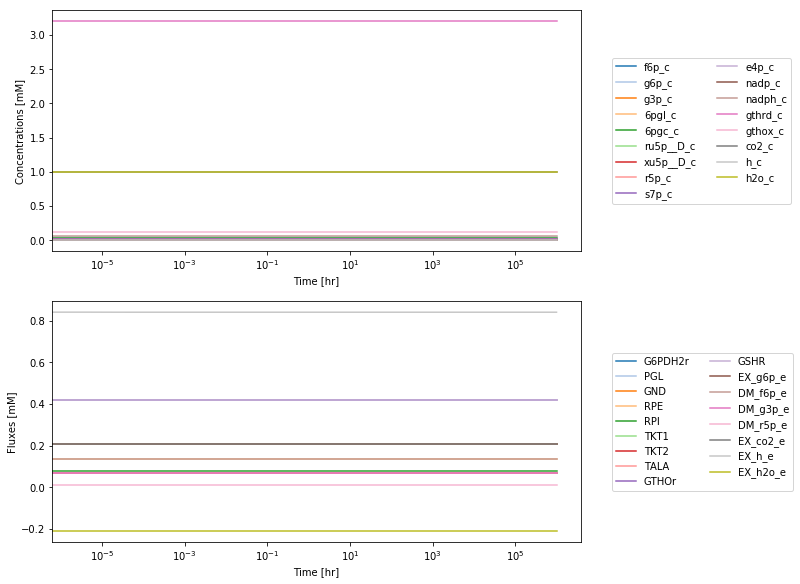

In [16]:
sim = Simulation(ppp)
sim.find_steady_state_model(ppp, update_initial_conditions=True,
                            update_reactions=True);
sim.update_values(ppp);
t0, tf = (0, 1e6)
conc_sol, flux_sol = sim.simulate_model(ppp, time=(t0, tf))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 8), constrained_layout=True);

plot_simulation(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Concentrations [mM]");

plot_simulation(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Fluxes [mM]");

### Optional Information: Storing references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the __MassModel.compartments__ attribute.

In [17]:
ppp.compartments = {"c": "Cytosol"}
print(ppp.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount, "Liters" for volume, and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the __MassModel.units__ attribute. Like the __compartment__ attribute, the __units__ attribute is a dictionary and can easily be updated using the same methods.

Note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [18]:
ppp.units = {'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}
ppp.units

{'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}

## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or if the model conforms to SBML standards, as a ".xml" file using the classes in __mass.io__. To export the model, only the path to the directory and the name of the model need to be specified. Both are shown. 

### Export using JSON

In [19]:
io.json.save_json_model(ppp, os.path.abspath("../../test-models/json-models/pentose_phosphate_pathway.json"))

### Export using SBML

In [20]:
# io.sbml.write_sbml_model(ppp, os.path.abspath("../../test-models/sbml-models/pentose_phosphate_pathway.xml"))